In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds

In [2]:
(training_images, training_labels) , (validation_images , validation_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
def preprocess_image_input(input_images):
  input_images=input_images.astype('float32')
  output_ims= tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_ims

In [4]:
train_X = preprocess_image_input(training_images)
valid_X = preprocess_image_input(validation_images)

In [5]:
def feature_extractor(inputs):
  feature_extractor = tf.keras.applications.resnet50.ResNet50(input_shape=(224,224,3),
                                                              include_top=False,
                                                              weights='imagenet')(inputs)
  return feature_extractor


In [6]:
def classifier(inputs):
  x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(1024, activation="relu")(x)
  x = tf.keras.layers.Dense(512,activation="relu")(x)
  x = tf.keras.layers.Dense(10,activation="softmax",name="classification")(x)
  return x

In [7]:
def final_model(inputs):
  ressize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)
  resnet_feature_extractor = feature_extractor(ressize)
  classification_output = classifier(resnet_feature_extractor)
  return classification_output

In [8]:
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))

  classification_output = final_model(inputs)

  model = tf.keras.Model(inputs=inputs, outputs= classification_output)
  model.compile(optimizer='sgd', loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

  return model


In [9]:
model = define_compile_model()
model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                              

In [ ]:
# From epoch 4 we se the validation accuracy is decresing so we will stop the model training beyond epoch 4.
history = model.fit(train_X, training_labels, epochs=5, validation_data = (valid_X, validation_labels), batch_size = 64)

# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(valid_X,validation_labels,verbose=2)
print("Test_Loss is:",test_loss)
print("Test_acc is:",test_acc)

Epoch 1/5
782/782 [==============================] - 553s 656ms/step - loss: 0.3972 - accuracy: 0.8718 - val_loss: 0.2290 - val_accuracy: 0.9219
Epoch 2/5
782/782 [==============================] - 500s 639ms/step - loss: 0.0999 - accuracy: 0.9679 - val_loss: 0.1648 - val_accuracy: 0.9428
Epoch 3/5
782/782 [==============================] - 500s 639ms/step - loss: 0.0347 - accuracy: 0.9901 - val_loss: 0.2010 - val_accuracy: 0.9392
Epoch 4/5
782/782 [==============================] - 500s 639ms/step - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.1910 - val_accuracy: 0.9478
Epoch 5/5
782/782 [==============================] - 500s 640ms/step - loss: 0.0083 - accuracy: 0.9982 - val_loss: 0.1720 - val_accuracy: 0.9541


Epoch 1/4
782/782 [==============================] - 494s 631ms/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 0.1746 - val_accuracy: 0.9558
Epoch 2/4
782/782 [==============================] - 515s 659ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.1798 - val_accuracy: 0.9564
Epoch 3/4
782/782 [==============================] - 513s 656ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.1811 - val_accuracy: 0.9579
Epoch 4/4
782/782 [==============================] - 513s 657ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.1862 - val_accuracy: 0.9567
313/313 - 27s - loss: 0.1862 - accuracy: 0.9567 - 27s/epoch - 87ms/step
Test_Loss is: 0.18615764379501343
Test_acc is: 0.9567000269889832


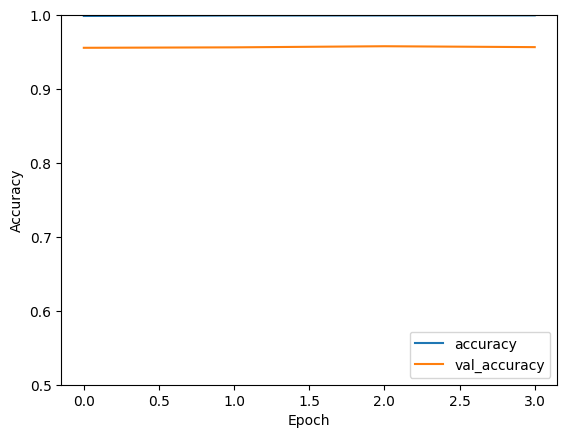

In [ ]:
# From epoch 4 we se the validation accuracy is decresing so we will stop the model training beyond epoch 4.
history = model.fit(train_X, training_labels, epochs=4, validation_data = (valid_X, validation_labels), batch_size = 64)

# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(valid_X,validation_labels,verbose=2)
print("Test_Loss is:",test_loss)
print("Test_acc is:",test_acc)

In [ ]:
history = model.fit(train_X, training_labels, epochs=10, validation_data = (valid_X, validation_labels), batch_size = 64)

In [ ]:
# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(valid_X,validation_labels,verbose=2)
print("Test_Loss is:",test_loss)
print("Test_acc is:",test_acc)

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
from tensorflow.keras.optimizers import Adam

In [22]:
# Implement Dropout to avoid overfitting of model.
# Define the ResNet50 model as a function
def create_model(learning_rate=0.001, dropout_rate=0.2): 
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs) 
  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3), include_top=False,
  weights='imagenet')(resize) 
  x = tf.keras.layers.GlobalAveragePooling2D()(feature_extractor)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(1024, activation="relu")(x) 
  x = tf.keras.layers.Dropout(dropout_rate)(x)
  x = tf.keras.layers.Dense(512, activation="relu")(x) 
  x = tf.keras.layers.Dropout(dropout_rate)(x)
  x = tf.keras.layers.Dense(10, activation="softmax",name="classification")(x)
  model = tf.keras.Model(inputs=inputs, outputs=x) 
  optimizer = Adam(learning_rate=learning_rate) 
  model.compile(optimizer=optimizer,
  loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  # Wrap the model using KerasClassifier
  model = KerasClassifier(build_fn=create_model, epochs=3, batch_size=64, verbose=1)
  # Define the hyper-parameters to search over
  param_dist = {'learning_rate': [0.01, 0.1,0.00001], 'dropout_rate': [0.1, 0.2,0.10]}
  # Perform random search
  search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=3)
  search_result = search.fit(train_X, training_labels)
  # Print the best hyper-parameters
  print("Best Score is:",search_result.best_score_)
  print("Best: %f using %s" % (search_result.best_score_, search_result.best_params_))